In [1]:
import os
os.chdir('/home/bill/GitHub/wps-research/data/bill')

In [2]:
import raster
import numpy as np
from plot_tools import plot
from misc import htrim_3d

In [3]:
import importlib

importlib.reload(raster)

<module 'raster' from '/home/bill/GitHub/wps-research/data/bill/raster.py'>

In [4]:
from raster import Raster

In [5]:
def get_nodata_mask(
        img_dat: np.ndarray,
        nodata_val: float = np.nan
) -> np.ndarray:
    if np.isnan(nodata_val):
        return np.all(np.isnan(img_dat), axis=-1)
    else:
        return np.all(img_dat == nodata_val, axis=-1)

In [8]:
img_f = 'C11659/L1C/S2B_MSIL1C_20250512T191909_N0511_R099_T09UYU_20250512T225156_20m.bin'

mask_f = 'C11659/nodata/S2B_MSIL2A_20250512T191909_N0511_R099_T09UYU_20250512T231513_SCL_scl_mask_val0.bin'

In [17]:
img_obj = Raster(img_f)
img = img_obj.read_bands()

mask_obj = Raster(mask_f)
mask = mask_obj.read_bands().squeeze().astype(np.bool_)

In [10]:
nodata_mask = get_nodata_mask(img)

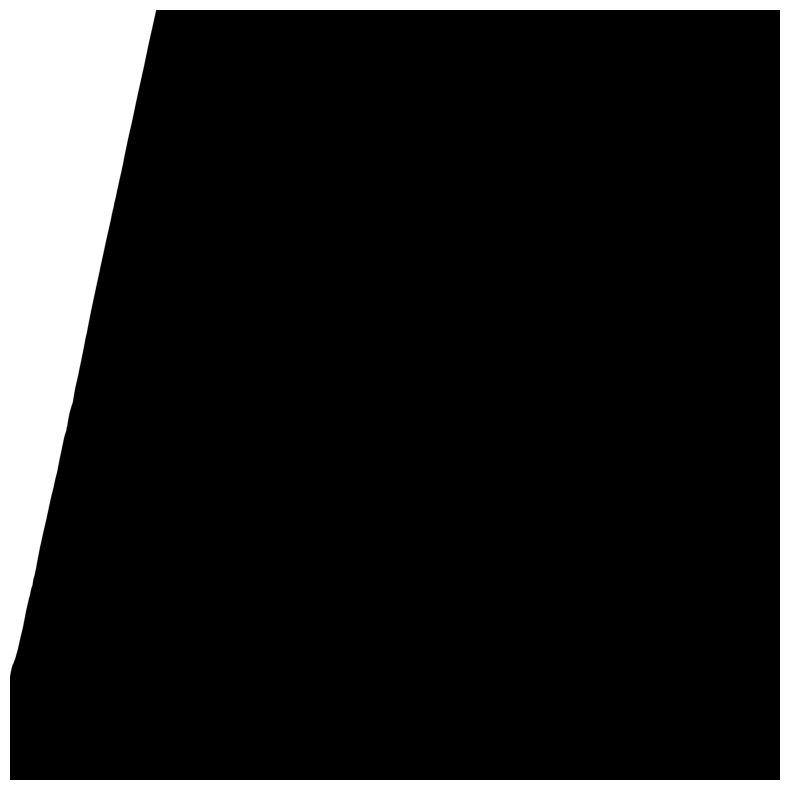

In [11]:
plot(nodata_mask)

In [18]:
img_2 = img.copy()
img_2[mask] = 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


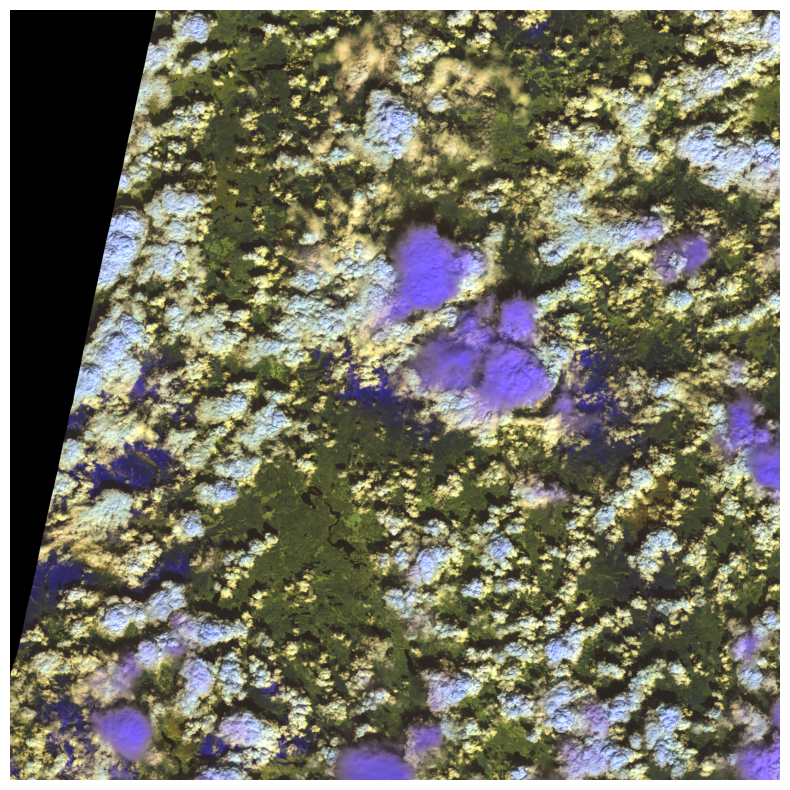

In [19]:
plot(htrim_3d(img_2[..., [0,1,2]]))